# Convolutional Neural Networks (CNNs): Theory and Practice

This notebook provides a comprehensive introduction to Convolutional Neural Networks (CNNs), covering both theoretical concepts and practical implementations. By the end of this notebook, you will understand how CNNs work, their key components, popular architectures, and how to implement them using TensorFlow/Keras.

## Table of Contents

1. [Introduction to Convolutional Neural Networks](#introduction)
2. [Core Concepts and Components](#concepts)
3. [CNN Architectures](#architectures)
4. [Practical Applications](#applications)
5. [Practical Implementation](#implementation)
   - [Setting Up the Environment](#setup)
   - [Loading and Exploring the Dataset](#dataset)
   - [Building a Simple CNN](#simple-cnn)
   - [Training and Evaluation](#training)
   - [Visualizing Feature Maps and Filters](#visualization)
   - [Implementing a LeNet-5 Inspired Model](#lenet)
   - [Comparing Model Performance](#comparison)
6. [Challenges and Future Directions](#challenges)
7. [Conclusion](#conclusion)

<a id='introduction'></a>
## 1. Introduction to Convolutional Neural Networks

Convolutional Neural Networks (CNNs) represent a revolutionary class of deep learning algorithms specifically designed for processing grid-like data, with their most prominent application being in computer vision. Unlike traditional neural networks, CNNs are engineered to automatically and efficiently extract hierarchical features from input data, making them exceptionally powerful for tasks such as image classification, object detection, and image segmentation.

The fundamental inspiration behind CNNs comes from the organization of the animal visual cortex, where individual neurons respond to stimuli only in a restricted region of the visual field known as the receptive field. These neurons work collectively to cover the entire visual area, creating a powerful system for processing visual information. Similarly, CNNs employ a specialized architecture that leverages spatial relationships in data through local connectivity patterns, shared weights, and pooling operations.

What makes CNNs particularly effective is their ability to learn relevant features directly from raw data without requiring manual feature engineering. This automatic feature extraction capability has revolutionized fields ranging from computer vision to medical diagnostics, autonomous driving, and beyond.

<a id='concepts'></a>
## 2. Core Concepts and Components of CNNs

### The Convolution Operation

At the heart of CNNs lies the convolution operation, which gives these networks their name. Mathematically, convolution is an operation on two functions that produces a third function expressing how the shape of one is modified by the other. In the context of CNNs, this operation involves sliding a small matrix (called a filter or kernel) across the input data and computing element-wise multiplications followed by summation.

The convolution operation can be represented mathematically as:

```
y(i,j) = Σ Σ x(i-m, j-n) * w(m,n)
```

Where:
- x represents the input data (such as an image)
- w is the kernel or filter
- y is the resulting feature map

This operation allows CNNs to detect various features in the input data, such as edges, textures, and more complex patterns as we move deeper into the network. Each filter is specialized to detect specific patterns, and the network learns the optimal values for these filters during training.

### Convolutional Layers

Convolutional layers form the primary building blocks of a CNN architecture. In these layers, a set of learnable filters is applied to the input data to produce feature maps. Each filter slides across the input, performing the convolution operation at each position. The key characteristics of convolutional layers include:

1. **Local Connectivity**: Unlike fully connected layers where each neuron connects to every neuron in the previous layer, neurons in convolutional layers connect only to a small region of the input volume. This drastically reduces the number of parameters, making the network more efficient.

2. **Parameter Sharing**: The same filter weights are used across the entire input space, which means that a feature detector that is useful in one part of the image is likely useful in another part as well. This further reduces the number of parameters and makes the network more efficient.

3. **Spatial Hierarchy**: As we stack multiple convolutional layers, the network can learn increasingly complex features. Early layers might detect simple features like edges and corners, while deeper layers can recognize more complex patterns like faces or objects.

### Activation Functions

After the convolution operation, an activation function is applied to introduce non-linearity into the model. The most commonly used activation function in CNNs is the Rectified Linear Unit (ReLU), which is defined as:

```
f(x) = max(0, x)
```

ReLU simply replaces all negative values in the feature map with zero, allowing for faster and more effective training compared to traditional activation functions like sigmoid or tanh. Other variants include Leaky ReLU, Parametric ReLU, and ELU (Exponential Linear Unit), each with its own advantages in specific scenarios.

### Pooling Layers

Pooling layers are periodically inserted between successive convolutional layers to reduce the spatial dimensions (width and height) of the data flowing through the network. This serves several purposes:

1. **Dimensionality Reduction**: By reducing the size of feature maps, pooling decreases the computational load for subsequent layers.

2. **Translation Invariance**: Pooling helps the network become more robust to small translations or shifts in the input data.

3. **Feature Selection**: Pooling extracts the most prominent features from each region, discarding less important details.

The most common pooling operations are:

- **Max Pooling**: Takes the maximum value from each local region, effectively selecting the most prominent feature.
- **Average Pooling**: Computes the average value of each local region, providing a more holistic representation.
- **Global Pooling**: Reduces each feature map to a single value, often used before fully connected layers.

### Fully Connected Layers

After several convolutional and pooling layers, the high-level reasoning in the neural network is done via fully connected layers. These layers connect every neuron in one layer to every neuron in the next layer, similar to traditional neural networks. The purpose of fully connected layers is to:

1. **Flatten the Data**: Convert the 3D feature maps into a 1D feature vector.
2. **Combine Features**: Integrate features from different parts of the input.
3. **Classification**: Perform the final classification or regression task based on the extracted features.

### Dropout and Regularization

To prevent overfitting, CNNs often employ regularization techniques such as dropout. Dropout randomly deactivates a fraction of neurons during training, forcing the network to learn more robust features that don't rely on specific neuron combinations. This improves generalization to unseen data.

Other regularization techniques include:
- L1 and L2 regularization (weight decay)
- Batch normalization
- Data augmentation (artificially expanding the training dataset through transformations)

<a id='architectures'></a>
## 3. CNN Architectures

The field of CNN architecture design has evolved rapidly since the introduction of LeNet in the late 1990s. Each new architecture has brought innovations that have pushed the boundaries of what's possible with deep learning. Here's an overview of the most influential CNN architectures:

### LeNet-5 (1998)

Developed by Yann LeCun and his colleagues, LeNet-5 was one of the earliest CNNs designed for handwritten digit recognition. Despite its relative simplicity by today's standards, it established the fundamental concepts of convolutional networks:

- It used 5x5 convolutions with stride 1
- It employed average pooling layers
- It had two convolutional layers followed by three fully connected layers
- It contained approximately 60,000 parameters

LeNet-5 achieved remarkable success in recognizing handwritten digits and was used by banks for processing checks. Its architecture laid the groundwork for future CNN designs.

### AlexNet (2012)

AlexNet, developed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton, marked a watershed moment in deep learning history when it won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012 by a significant margin. AlexNet's innovations included:

- Deeper architecture with 5 convolutional layers and 3 fully connected layers
- Use of ReLU activation functions instead of tanh or sigmoid
- Implementation of dropout for regularization
- Data augmentation techniques to reduce overfitting
- Training on multiple GPUs
- Local response normalization

With approximately 60 million parameters, AlexNet demonstrated the power of deep convolutional networks and sparked renewed interest in deep learning for computer vision.

### VGGNet (2014)

Developed by the Visual Geometry Group at Oxford, VGGNet simplified CNN architecture design by using consistent elements throughout. Its key characteristics were:

- Very deep network (16-19 layers)
- Exclusive use of 3x3 convolution filters with stride 1
- 2x2 max pooling layers with stride 2
- Same padding to preserve spatial dimensions
- Increasing number of filters as the network deepens

Despite its simplicity, VGG achieved excellent performance and is still widely used as a feature extractor due to its uniform architecture and good generalization capabilities. However, with 138 million parameters, it is computationally expensive.

### GoogLeNet/Inception (2014)

GoogLeNet, developed by researchers at Google, introduced the "Inception module" which allowed for more efficient computation and deeper networks. Key innovations included:

- Use of 1x1 convolutions to reduce dimensionality before expensive 3x3 and 5x5 convolutions
- Parallel pathways within each module to capture features at different scales
- Auxiliary classifiers during training to combat the vanishing gradient problem
- Global average pooling instead of fully connected layers at the end

With only 4 million parameters (significantly fewer than AlexNet or VGG), GoogLeNet achieved state-of-the-art performance while being computationally efficient.

### ResNet (2015)

Residual Networks (ResNet), introduced by researchers at Microsoft, tackled the problem of training very deep networks by introducing skip connections or "shortcuts" that allow gradients to flow more easily through the network. Key features include:

- Introduction of residual blocks with identity shortcuts
- Extremely deep architectures (up to 152 layers)
- Batch normalization after each convolution
- Global average pooling before the final fully connected layer

ResNet's innovation enabled the training of much deeper networks than previously possible, and variants of ResNet continue to be widely used in various computer vision tasks.

<a id='applications'></a>
## 4. Practical Applications of CNNs

Convolutional Neural Networks have transformed numerous fields through their powerful feature extraction capabilities. Here are some of the most impactful applications:

### Image Recognition and Classification

The most fundamental application of CNNs is image classification, where the network is trained to categorize images into predefined classes. This technology powers:

- Photo organization in applications like Google Photos
- Content filtering on social media platforms
- Product categorization in e-commerce
- Plant and animal species identification

### Object Detection and Localization

Beyond simple classification, CNNs can identify multiple objects within an image and locate them with bounding boxes. This capability is crucial for:

- Autonomous vehicles to detect pedestrians, vehicles, and road signs
- Security systems for surveillance and threat detection
- Retail analytics to track customer behavior and product placement
- Wildlife monitoring and conservation efforts

### Image Segmentation

Image segmentation involves classifying each pixel in an image, allowing for precise delineation of objects. Applications include:

- Medical imaging for tumor detection and organ segmentation
- Satellite imagery analysis for land use classification
- Augmented reality for scene understanding
- Industrial quality control for defect detection

### Medical Imaging and Diagnostics

CNNs have revolutionized medical imaging by providing automated analysis tools that can:

- Detect abnormalities in X-rays, CT scans, and MRIs
- Identify cancerous cells in pathology slides
- Segment organs and tissues for surgical planning
- Predict disease progression from longitudinal imaging data

### Autonomous Driving and Robotics

Computer vision powered by CNNs is essential for autonomous systems to perceive and understand their environment:

- Lane detection and road segmentation
- Traffic sign recognition
- Pedestrian and vehicle detection
- Obstacle avoidance and path planning
- Visual simultaneous localization and mapping (SLAM)

### Natural Language Processing

While primarily associated with computer vision, CNNs have also been applied to text data for:

- Text classification and sentiment analysis
- Named entity recognition
- Machine translation
- Document classification

### Video Analysis

Extending beyond static images, CNNs can analyze video content for:

- Action recognition in sports analytics
- Anomaly detection in surveillance footage
- Video summarization and content-based retrieval
- Emotion recognition from facial expressions

<a id='implementation'></a>
## 5. Practical Implementation

In this section, we'll implement CNNs using TensorFlow and Keras to demonstrate the concepts discussed in the theoretical sections. We'll build, train, and evaluate CNN models on the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes.

<a id='setup'></a>
### Setting Up the Environment

First, let's import the necessary libraries and set up our environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import os

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create a directory for saving visualizations
os.makedirs('images', exist_ok=True)

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

# Check if GPU is available
print(f"GPU available: {len(tf.config.list_physical_devices('GPU')) > 0}")

2025-04-23 16:51:35.518576: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 16:51:35.521313: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 16:51:35.528959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745437895.542293   20212 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745437895.546005   20212 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745437895.556583   20212 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

TensorFlow version: 2.19.0
Keras version: 3.9.2
GPU available: False


2025-04-23 16:51:36.928408: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


<a id='dataset'></a>
### Loading and Exploring the Dataset

Next, let's load the CIFAR-10 dataset and explore its structure.

In [2]:
# Load and prepare the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Print dataset shapes
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


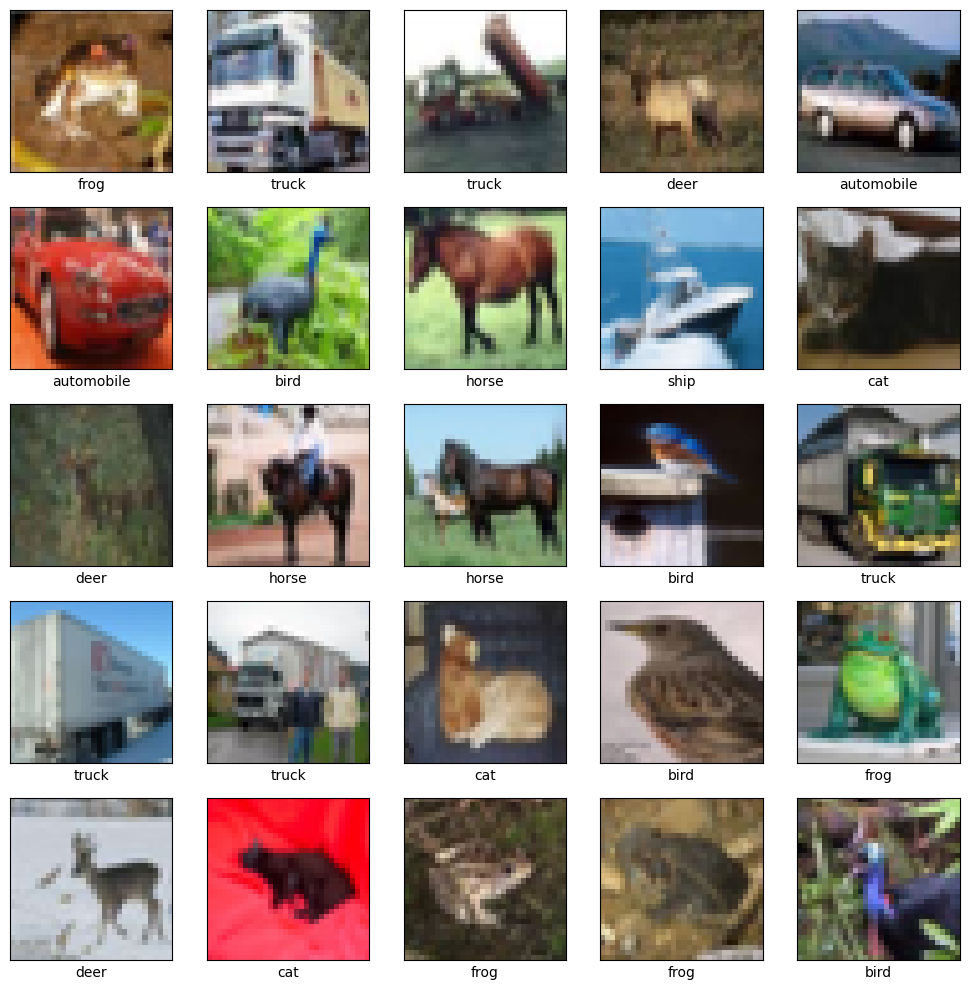

In [3]:
# Function to plot images
def plot_images(images, labels, class_names, filename=None):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i]])
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

# Plot some sample images
plot_images(train_images[:25], train_labels.reshape(-1), class_names)

<a id='simple-cnn'></a>
### Building a Simple CNN

Now, let's build a simple CNN model for the CIFAR-10 dataset.

In [4]:
# Function to create a simple CNN model for CIFAR-10
def create_simple_cnn():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv1'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool1'),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool2'),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool3'),
        
        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(128, activation='relu', name='dense1'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax', name='output')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the model
simple_model = create_simple_cnn()

# Display the model summary
simple_model.summary()

/home/carlos/projects/ML/Instructed Notebook on CNN Concepts and Demonstrations/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

<a id='training'></a>
### Training and Evaluation

Let's train our CNN model and evaluate its performance.

In [5]:
# Function to plot model training history
def plot_training_history(history, filename=None):
    plt.figure(figsize=(12, 5))
    
    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    
    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

In [6]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

history = simple_model.fit(
    train_images, train_labels_one_hot,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20


2025-04-23 16:51:40.405271: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3092 - loss: 1.9905

2025-04-23 16:52:05.569378: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.3093 - loss: 1.9901 - val_accuracy: 0.4849 - val_loss: 1.4032
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4875 - loss: 1.4183 - val_accuracy: 0.5346 - val_loss: 1.3528
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5757 - loss: 1.1916 - val_accuracy: 0.6064 - val_loss: 1.1633
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6322 - loss: 1.0482 - val_accuracy: 0.6809 - val_loss: 0.9082
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6666 - loss: 0.9440 - val_accuracy: 0.6612 - val_loss: 0.9651
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.7024 - loss: 0.8525 - val_accuracy: 0.6723 - val_loss: 0.9897
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7263 - loss: 0.7893 - val_accuracy: 0.6543 - val_loss: 1.0315
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7492 - loss: 0.7096 - val_accurac

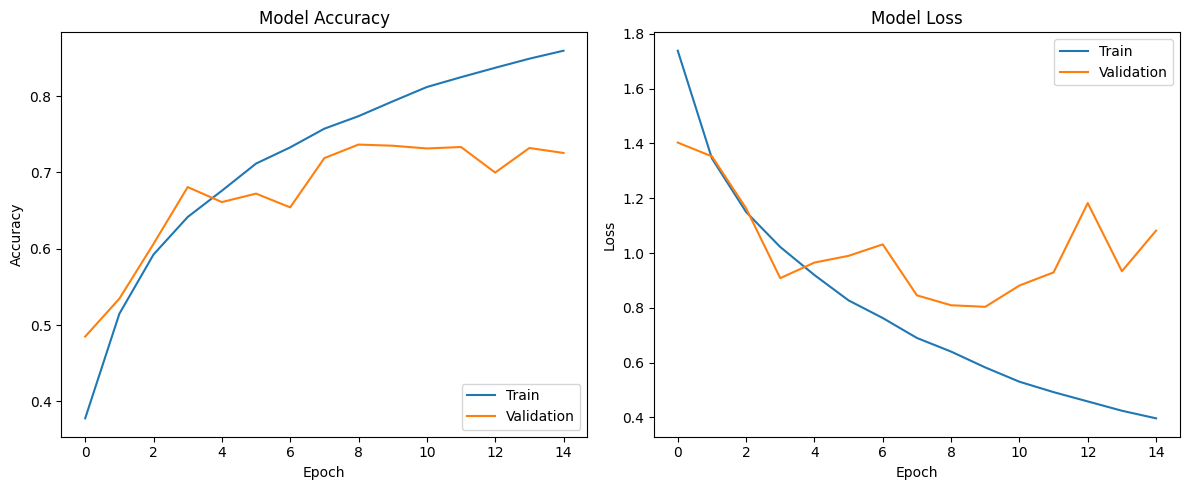

In [7]:
# Plot training history
plot_training_history(history)

In [8]:
# Evaluate the model
test_loss, test_acc = simple_model.evaluate(test_images, test_labels_one_hot, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

2025-04-23 16:57:48.003833: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 1s - 4ms/step - accuracy: 0.7327 - loss: 0.8207
Test accuracy: 0.7327


<a id='visualization'></a>
### Visualizing Feature Maps and Filters

Let's visualize the feature maps and filters learned by our CNN model to better understand what it's learning.

In [10]:
def visualize_feature_maps(model, image, layer_name, filename=None):
    # Ensures the image has the correct shape: (1, 32, 32, 3)
    image = np.expand_dims(image, axis=0)

    layer = model.get_layer(name=layer_name)

    # Get the feature maps for our input image
    activation_model = tf.keras.models.Model(
        inputs=model.layers[0].input,  # pega a entrada da primeira camada
        outputs=layer.output
    )

    # Generates the activations
    feature_maps = activation_model.predict(image)

    # Plot up to 16 feature maps or all if less than 16
    plt.figure(figsize=(15, 8))
    num_features = min(16, feature_maps.shape[-1])
    for i in range(num_features):
        plt.subplot(4, 4, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.suptitle(f'Mapas de Características da camada {layer_name}')
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()


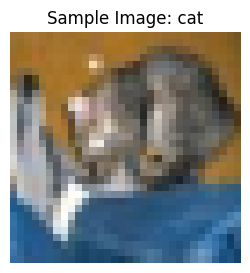

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


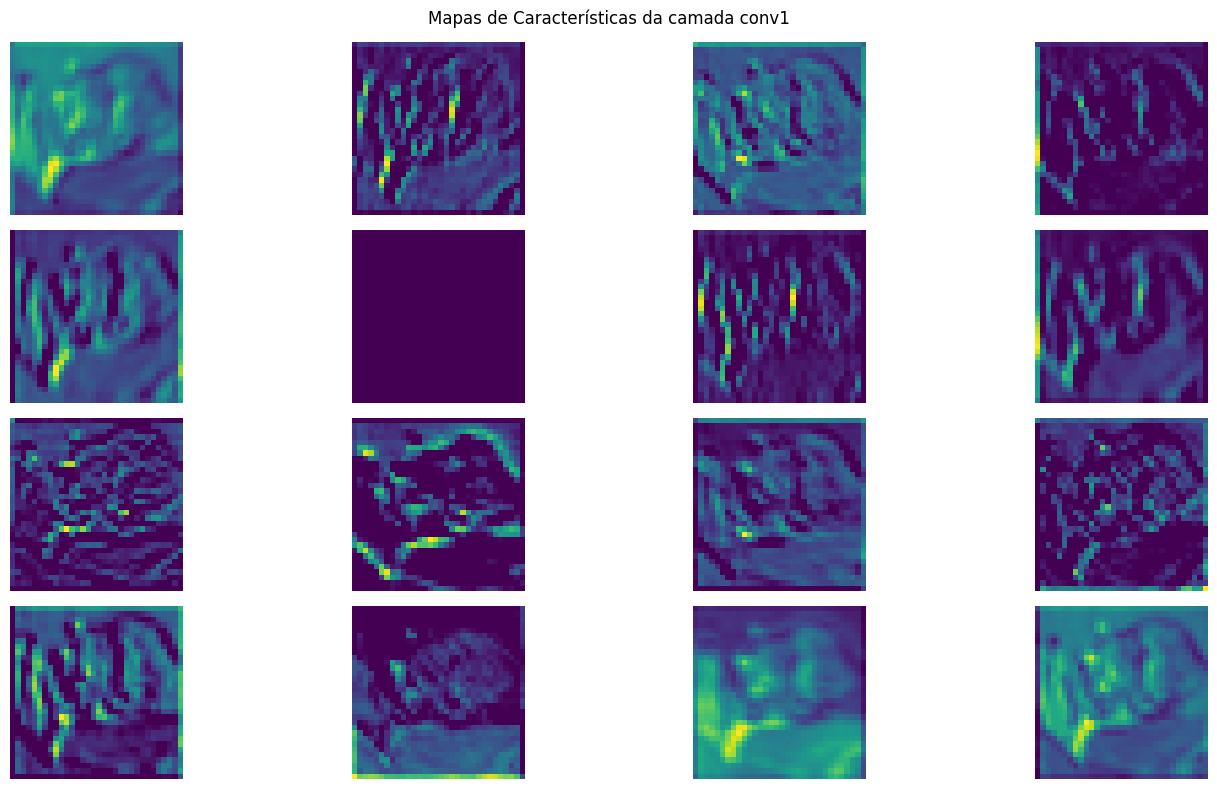

In [11]:
# Visualize feature maps from the first convolutional layer
sample_image = test_images[0]
plt.figure(figsize=(3, 3))
plt.imshow(sample_image)
plt.title(f"Sample Image: {class_names[test_labels[0][0]]}")
plt.axis('off')
plt.show()

visualize_feature_maps(simple_model, sample_image, 'conv1')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


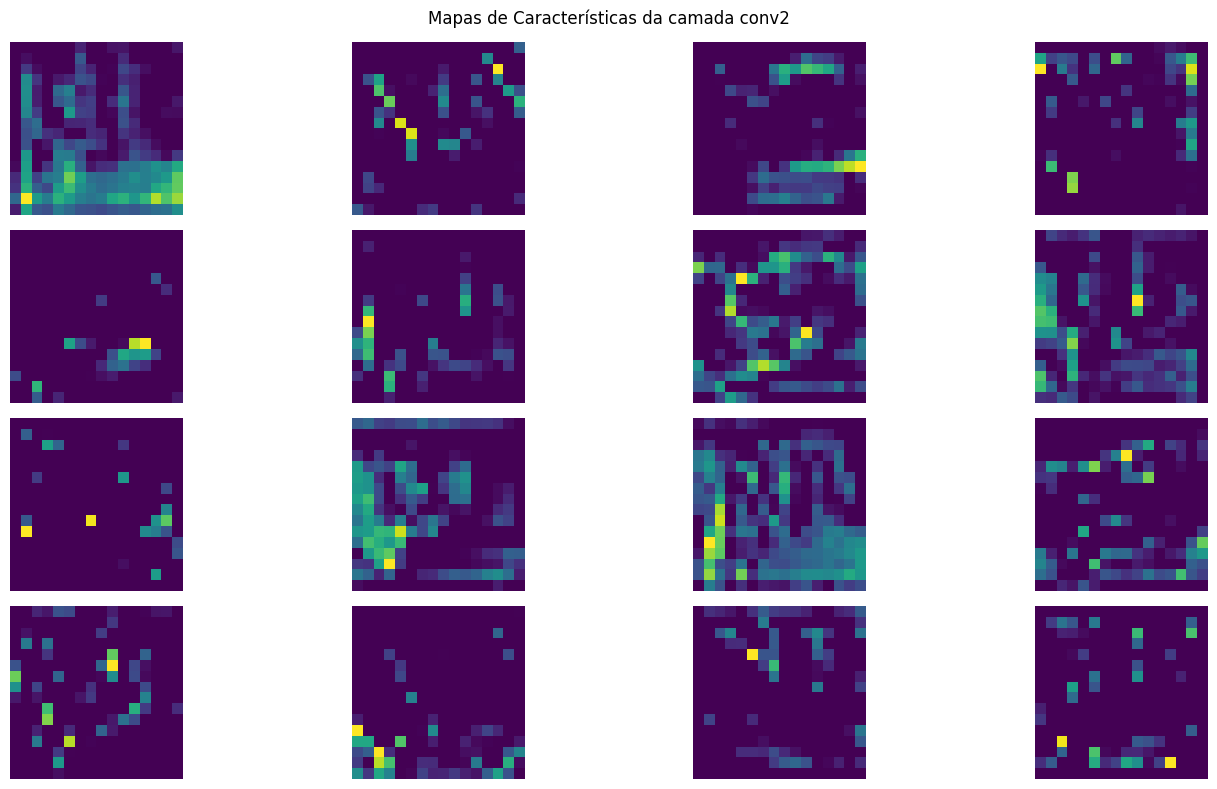

In [12]:
# Visualize feature maps from the second convolutional layer
visualize_feature_maps(simple_model, sample_image, 'conv2')

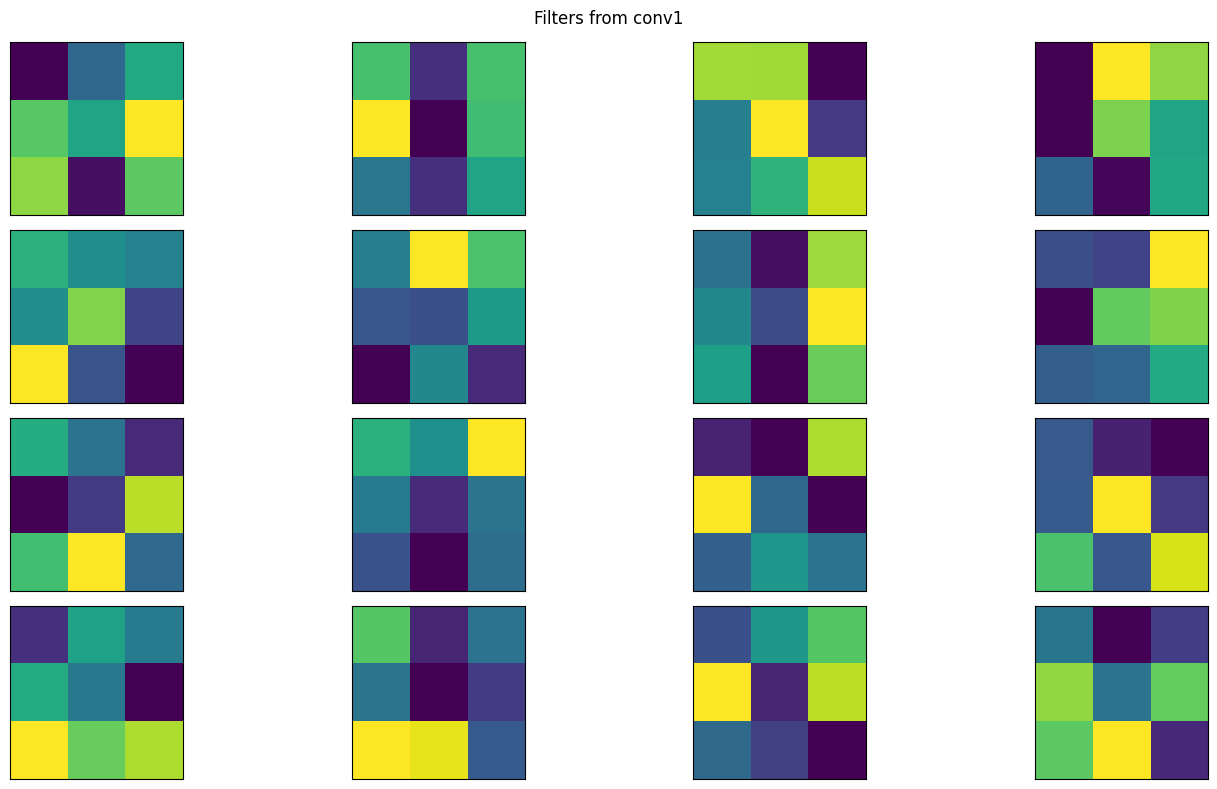

In [13]:
# Function to visualize filters
def visualize_filters(model, layer_name, filename=None):
    # Get the layer
    for layer in model.layers:
        if layer.name == layer_name:
            filters, biases = layer.get_weights()
            break
    
    # Normalize filter values to 0-1
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    # Plot the filters
    plt.figure(figsize=(15, 8))
    
    # Plot up to 16 filters or all if less than 16
    num_filters = min(16, filters.shape[-1])
    for i in range(num_filters):
        plt.subplot(4, 4, i + 1)
        # For RGB images, we'll visualize the filter for the first channel
        plt.imshow(filters[:, :, 0, i], cmap='viridis')
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle(f'Filters from {layer_name}')
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

# Visualize filters from the first convolutional layer
visualize_filters(simple_model, 'conv1')

<a id='lenet'></a>
### Implementing a LeNet-5 Inspired Model

Now, let's implement a LeNet-5 inspired model and compare its performance with our simple CNN.

In [14]:
# Function to create a LeNet-5 inspired model
def create_lenet_model():
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(6, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv1_lenet'),
        layers.AveragePooling2D((2, 2), name='pool1_lenet'),
        
        # Second Convolutional Layer
        layers.Conv2D(16, (5, 5), activation='relu', name='conv2_lenet'),
        layers.AveragePooling2D((2, 2), name='pool2_lenet'),
        
        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(120, activation='relu', name='dense1_lenet'),
        layers.Dense(84, activation='relu', name='dense2_lenet'),
        layers.Dense(10, activation='softmax', name='output_lenet')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the LeNet model
lenet_model = create_lenet_model()

# Display the model summary
lenet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_lenet (Conv2D)            │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1_lenet (AveragePooling2D)  │ (None, 16, 16, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_lenet (Conv2D)            │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2_lenet (AveragePooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1_lenet (Dense)            │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2_lenet (Dense)            │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_lenet (Dense)            │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the LeNet model
lenet_history = lenet_model.fit(
    train_images, train_labels_one_hot,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/15


2025-04-23 16:57:51.257564: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3063 - loss: 1.8885

2025-04-23 16:57:58.231553: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3064 - loss: 1.8882 - val_accuracy: 0.4594 - val_loss: 1.5222
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4726 - loss: 1.4767 - val_accuracy: 0.4941 - val_loss: 1.4389
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5162 - loss: 1.3542 - val_accuracy: 0.5195 - val_loss: 1.3811
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5452 - loss: 1.2727 - val_accuracy: 0.5399 - val_loss: 1.3176
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5709 - loss: 1.2046 - val_accuracy: 0.5574 - val_loss: 1.2781
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5946 - loss: 1.1401 - val_accuracy: 0.5698 - val_loss: 1.2412
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6176 - loss: 1.0854 - val_accuracy: 0.5781 - val_loss: 1.2297
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6360 - loss: 1.0370 - val_accuracy: 0.5839 

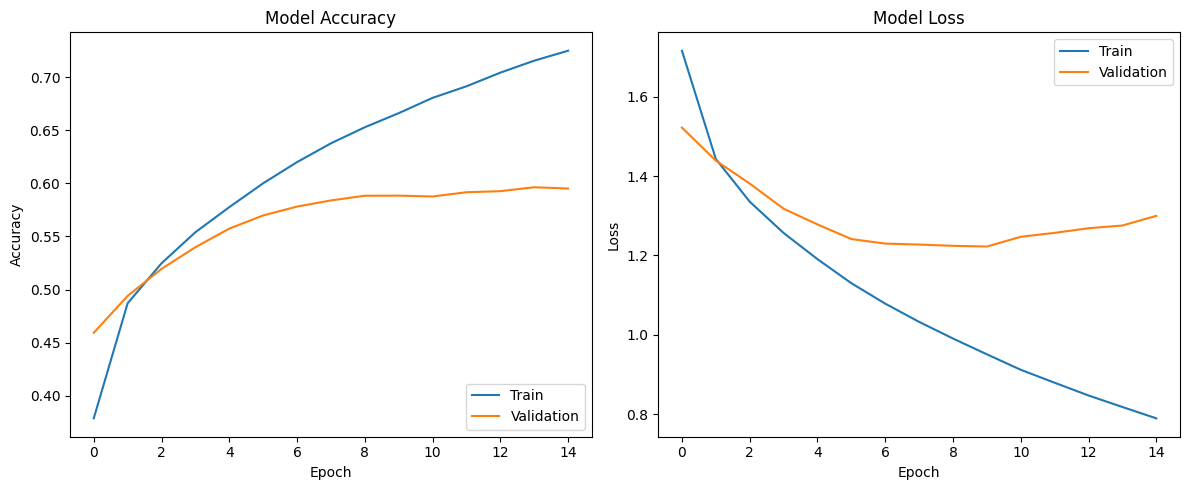

In [16]:
# Plot LeNet training history
plot_training_history(lenet_history)

In [17]:
# Evaluate the LeNet model
lenet_test_loss, lenet_test_acc = lenet_model.evaluate(test_images, test_labels_one_hot, verbose=2)
print(f"LeNet Test accuracy: {lenet_test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.5907 - loss: 1.2158
LeNet Test accuracy: 0.5907


<a id='comparison'></a>
### Comparing Model Performance

Let's compare the predictions of our simple CNN and LeNet-5 models.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


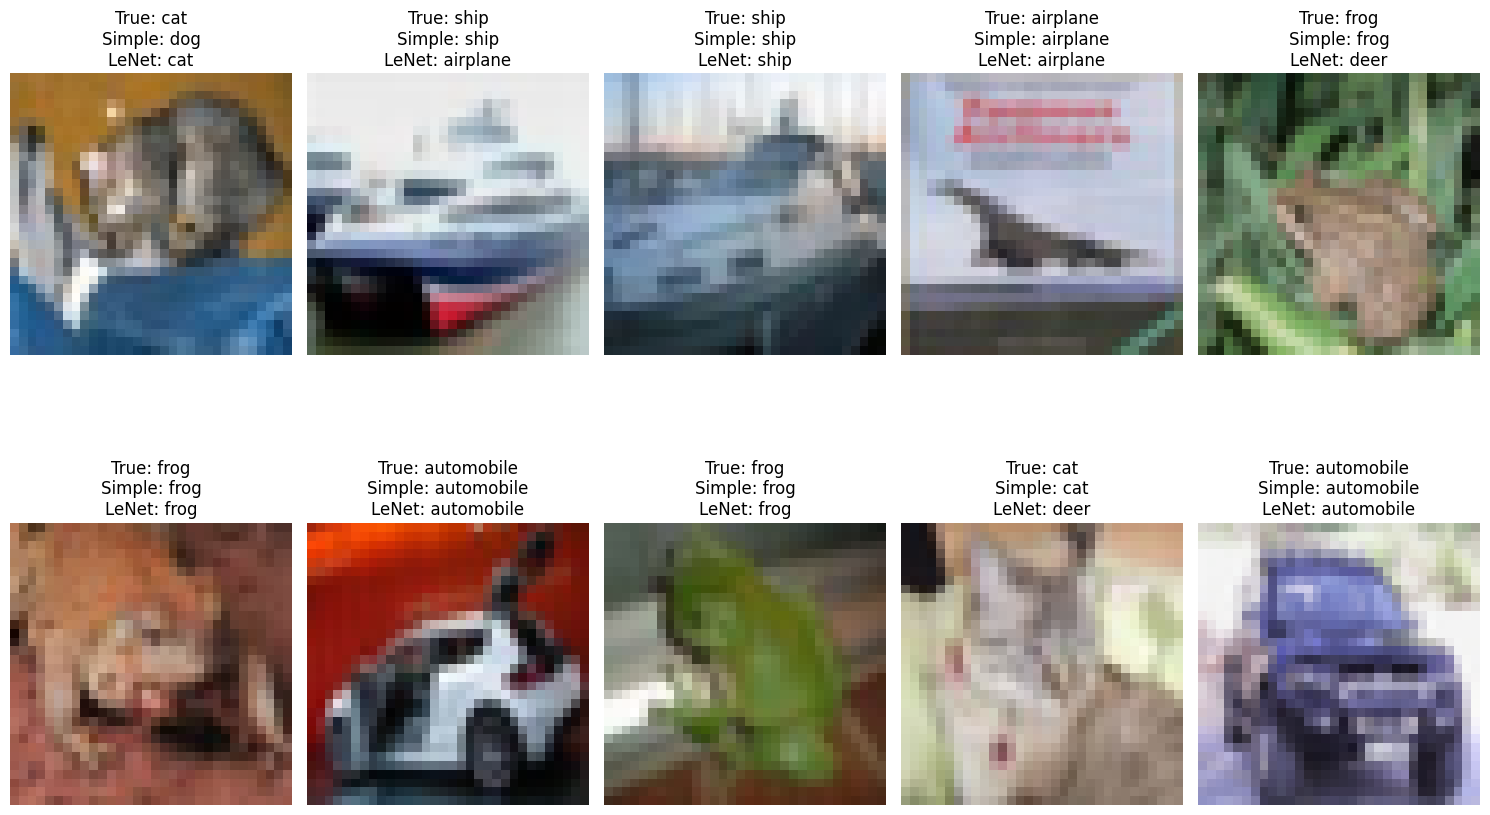

In [18]:
# Get predictions from both models
simple_predictions = simple_model.predict(test_images[:10])
lenet_predictions = lenet_model.predict(test_images[:10])

# Convert predictions to class indices
simple_pred_classes = np.argmax(simple_predictions, axis=1)
lenet_pred_classes = np.argmax(lenet_predictions, axis=1)
true_classes = test_labels[:10].reshape(-1)

# Display the results
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[true_classes[i]]}\n"
             f"Simple: {class_names[simple_pred_classes[i]]}\n"
             f"LeNet: {class_names[lenet_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Simple CNN Test Accuracy: 0.7327
LeNet-5 Test Accuracy: 0.5907


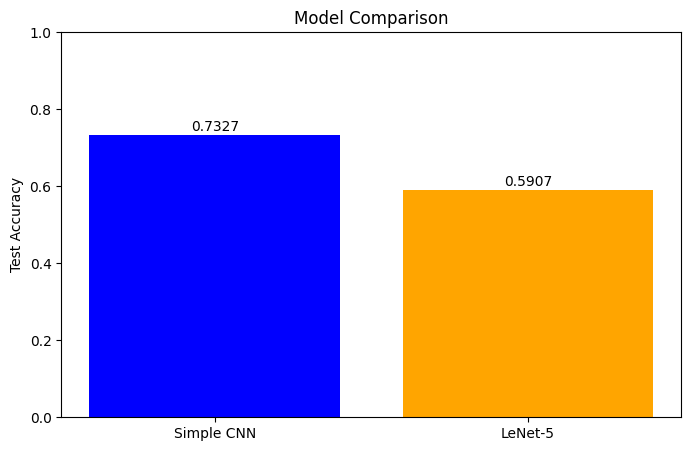

In [19]:
# Compare model performance
print(f"Simple CNN Test Accuracy: {test_acc:.4f}")
print(f"LeNet-5 Test Accuracy: {lenet_test_acc:.4f}")

# Create a bar chart to compare accuracies
plt.figure(figsize=(8, 5))
models = ['Simple CNN', 'LeNet-5']
accuracies = [test_acc, lenet_test_acc]
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1.0)
plt.ylabel('Test Accuracy')
plt.title('Model Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

<a id='challenges'></a>
## 6. Challenges and Future Directions

Despite their remarkable success, CNNs face several challenges that continue to drive research in the field:

### Interpretability and Explainability

The "black box" nature of deep neural networks makes it difficult to understand why a particular decision was made. Techniques such as Grad-CAM, LIME, and feature visualization aim to provide insights into CNN decision-making processes, which is particularly important in critical applications like healthcare and autonomous driving.

### Computational Efficiency

Training and deploying large CNN models requires significant computational resources. Research in model compression, quantization, and efficient architecture design aims to make CNNs more accessible for edge devices and resource-constrained environments.

### Data Efficiency

CNNs typically require large amounts of labeled data for training. Few-shot learning, transfer learning, and self-supervised learning approaches are being developed to reduce this dependency and enable learning from limited data.

### Robustness to Adversarial Attacks

CNNs can be vulnerable to adversarial examples—carefully crafted inputs designed to fool the network. Improving robustness against such attacks is crucial for security-critical applications.

### Ethical Considerations

As CNNs become more prevalent in society, ethical concerns around privacy, bias, and fairness must be addressed. Ensuring that CNN systems are developed and deployed responsibly is an ongoing challenge for the field.

<a id='conclusion'></a>
## 7. Conclusion

Convolutional Neural Networks have fundamentally transformed how we approach computer vision and other pattern recognition tasks. By automatically learning hierarchical features from data, CNNs have enabled breakthroughs in numerous fields and continue to drive innovation in artificial intelligence.

In this notebook, we've explored the theoretical foundations of CNNs, including their core components, popular architectures, and practical applications. We've also implemented and compared different CNN models on the CIFAR-10 dataset, visualizing what these networks learn and how they make predictions.

As research in deep learning continues to advance, we can expect CNNs to become more efficient, interpretable, and capable of solving increasingly complex problems. Understanding both the theoretical foundations and practical implementation details of CNNs is essential for anyone looking to apply these powerful tools to real-world problems.